# Project Name - Bike Sharing Demand Prediction

##### **Project Type**    - Supervised Machine Learning (Regression)
##### **Contribution**    - Individual

# Problem Statement 

**BUSINESS PROBLEM OVERVIEW**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

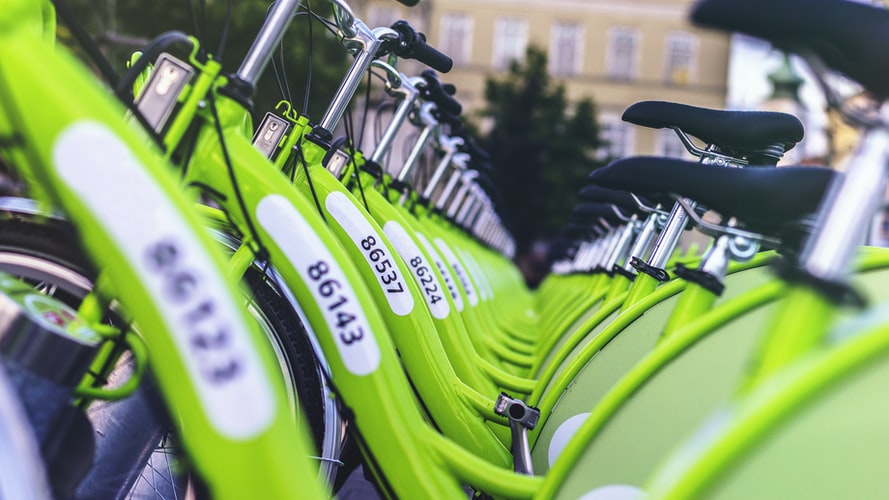

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## Importing Libraries

In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Importing sklearn libraries
from sklearn.model_selection import train_test_split

In [ ]:
# code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Mounting the drive and Loading Dataset

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
working_dir = '/content/drive/MyDrive/Almabetter/Capstone Projects/Bike Sharing Demand Prediction - Anas Malik/dat/'
dataset = pd.read_csv(working_dir+'SeoulBikeData.csv', encoding='unicode_escape')

# Data Inspection

## Dataset Rows & Columns

In [ ]:
# Shape of the dataset
dataset.shape

(8760, 14)

## Dataset First View

In [ ]:
# Viewing the data of top 5 rows
dataset.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dataset Information

In [ ]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Duplicate Values


In [ ]:
# Duplicated rows of Dataset
dataset.duplicated().sum()

0

## Missing Values/Null Values

In [ ]:
# Missing value counts
dataset.isnull().sum().sum()

0

<Axes: >

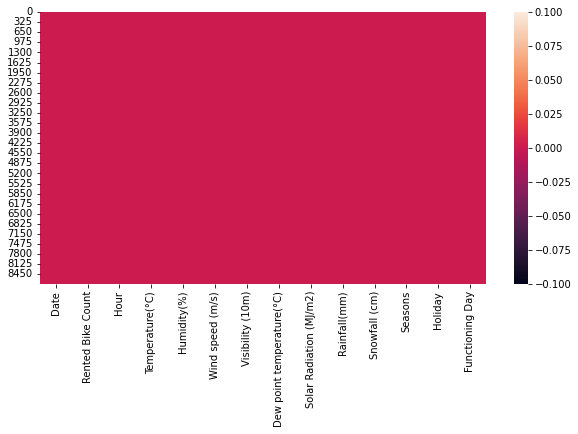

In [ ]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

## What did I understand about the Dataset ?

The given dataset is a dataset of rental bikes' demand in Seoul which is the capital of South Korea.
We need to predict the bike counts required at each hour for the stable supply of rental bikes.

The given dataset has 8760 rows and 14 columns. There are no missing values and also there are no duplicated entries.

This is a one year data because in a day, there are 24 hours and 365 days in a year, 24 mupltiplied by 365 is equal to 8760.

## Understanding Variables/Features

In [ ]:
# dataset columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Description
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Features Description

* **Date                :**Date of the day (dd/mm/yyyy). Type : str, need to convert into datetime.
* **Rented Bike Count             :**Number of rented bikes per hour (Dependent Variable). Type: int.
* **Hour:** Hour of the day. Type: int.
* **Temperature(°C):** Temperature (in celcius) of the day. Type: float.
* **Humidity(%):** Humidity (in percentage) of the day. Type: int.
* **Wind speed (m/s):** Speed of wind (in m/s). Type: float.
* **Visibility (10m):** Visibility(in m). Type: int.
* **Dew point temperature(°C):** Temperature(in celcius) at the beginning of day. Type: float.
* **Solar Radiation (MJ/m2):** Electromagnetic Radiation from sun. Type: float.
* **Rainfall(mm):**Raining amount(mm). Type: float.
* **Snowfall (cm):**Snowing amount(cm). Type: float.
* **Seasons:**Seasons of year. Type: str.
* **Holiday:**If day is a holiday or not. Type: str.
* **Functioning Day:**If day is a functioning day or not. Type: str.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


# Data Wrangling

## Copy of Dataset

In [ ]:
# Creating a copy of our dataset
df = dataset.copy()
df.shape

(8760, 14)

## Renaming Typical Column Names

In [ ]:
# Renaming typical column names
df = df.rename(columns={
    'Rented Bike Count':'Rented_Bike_Count',
    'Temperature(°C)':'Temperature',
    'Humidity(%)':'Humidity',
    'Wind speed (m/s)':'Wind_speed',
    'Visibility (10m)':'Visibility',
    'Dew point temperature(°C)':'Dew_point_temperature',
    'Solar Radiation (MJ/m2)':'Solar_Radiation',
    'Rainfall(mm)':'Rainfall',
    'Snowfall (cm)':'Snowfall',
    'Functioning Day':'Functioning_Day'
})

In [ ]:
# Checking the column names
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

## Creating Some New Columns (Feature Engineering)

In [ ]:
# To get the month first we need to convert date feature into datetime
import datetime as dt

df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [ ]:
# Date Column is converted into datetime type hence creating month and day feature 
df['Month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day_name()

In [ ]:
# Creating Weekend Column if day was a weekend day or not
df['Weekend'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [ ]:
# Dropping Date columns as there is not need of it now
df = df.drop(columns=['Date', 'day'], axis=1)

In [ ]:
# Now looking how our data lookslike
df.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0


# Exploratory Data Analysis

**What is EDA?**
* ***Exploratory Data Analysis (EDA) is one of the techniques used for extracting vital features and trends used by machine learning and deep learning models.***

**Why we perform EDA?**
* ***We need to perform EDA to get prior understanding of given data before making any assumptions. It also helps us to understand the relationship between dependent and independent variables.***

## Univariate Analysis

**It is a type of analysis where we visualize one variable at one time.**

In [ ]:
# creating a variable holding all the numerical features
numerical_features = df.select_dtypes(include=['int32', 'int64', 'float64', 'float32']).columns
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Weekend'],
      dtype='object')

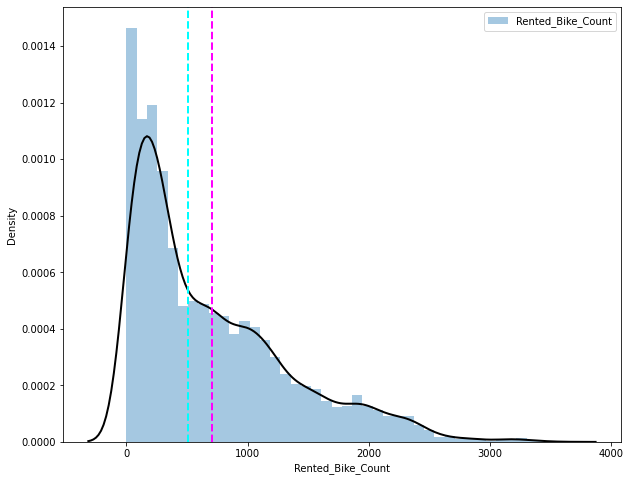

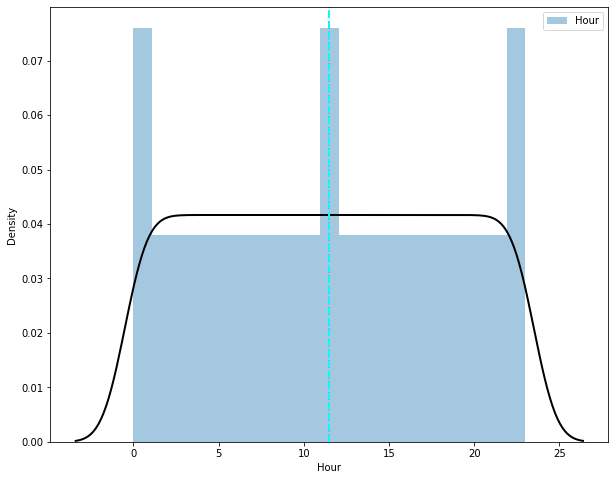

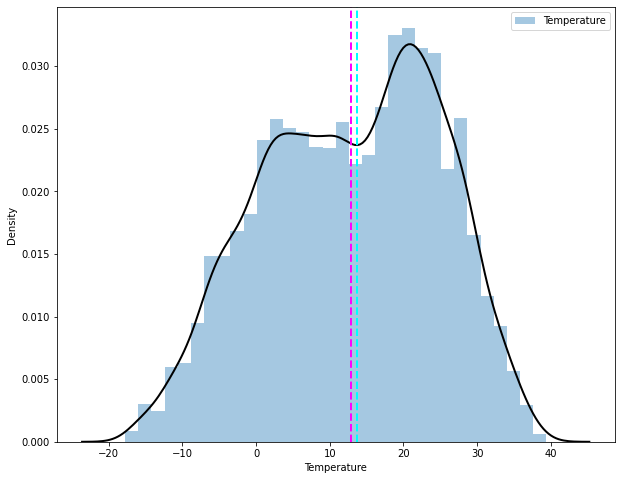

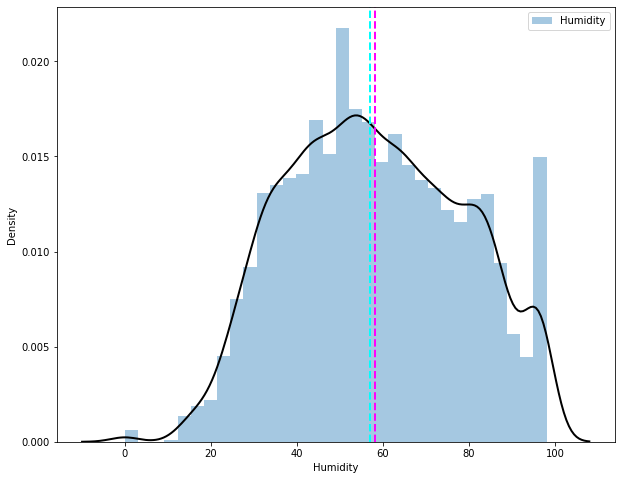

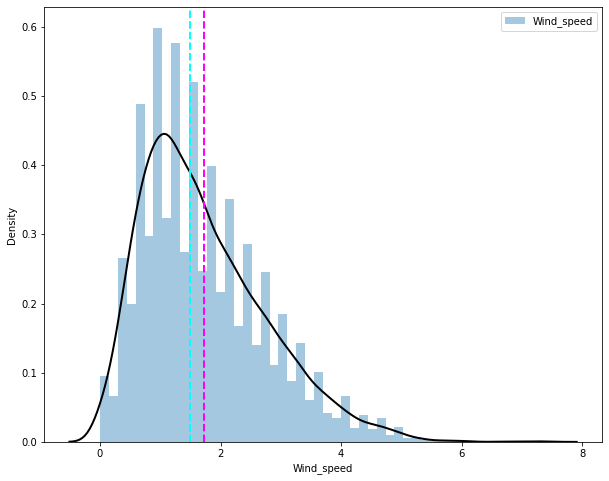

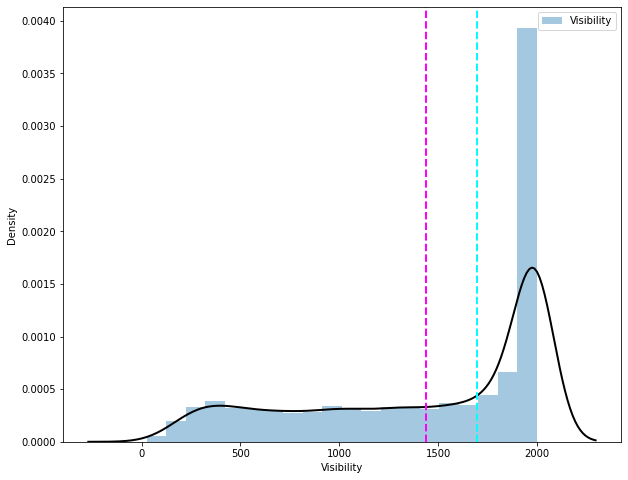

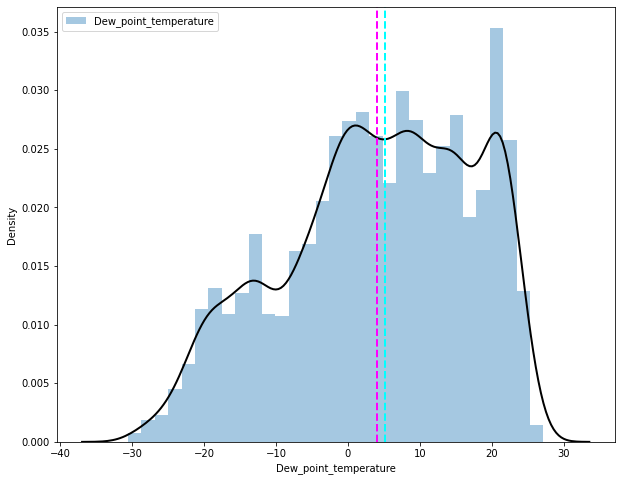

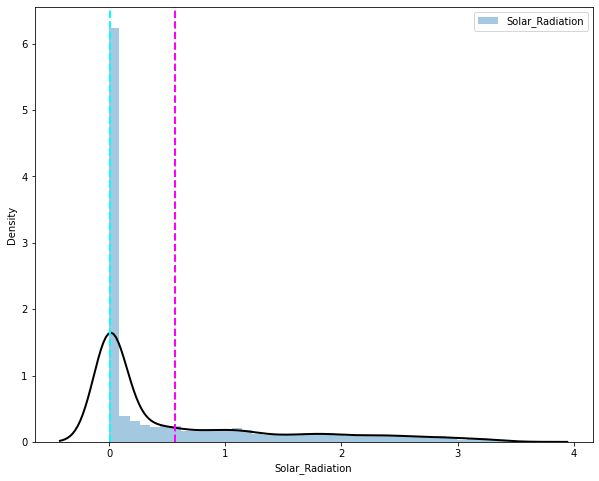

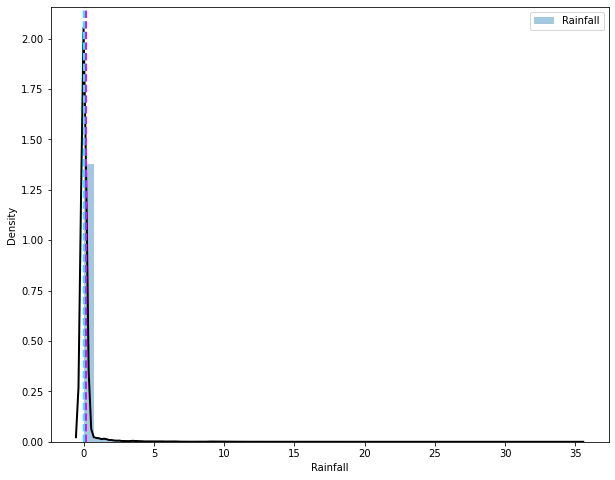

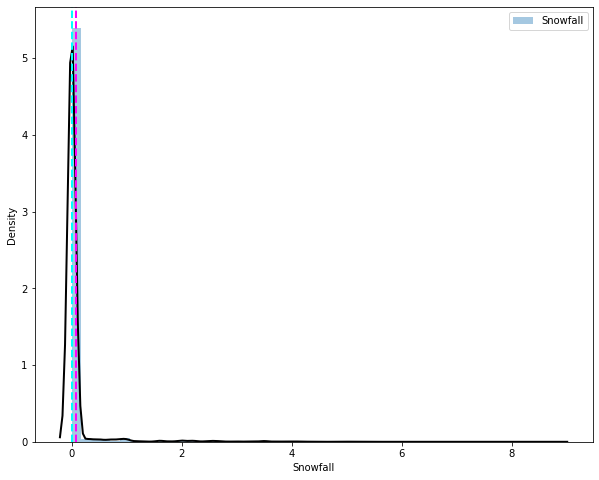

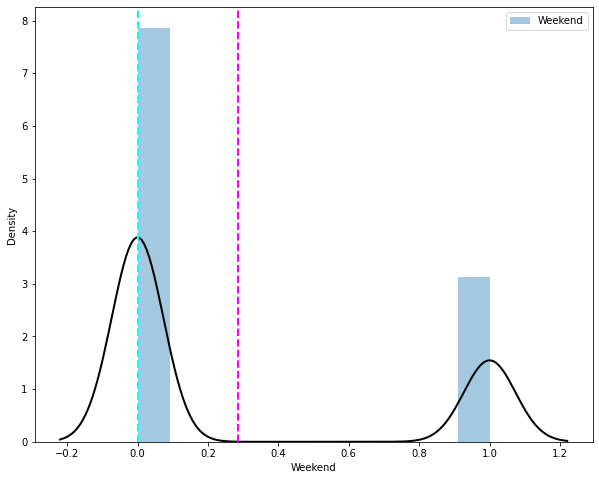

In [ ]:
# Visualizing the distribution of all numerical columns
for i, var in enumerate(numerical_features):
  fig = plt.figure(figsize=(10, 8))
  axis = fig.gca()
  sns.distplot(df[var], kde_kws={'linewidth': 2, 'color': 'black'}, label=var)
  axis.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
  axis.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(var)
  plt.ylabel("Density")
  plt.legend()

**Some Conculsion about distribution of Numerical Columns**


*   **Rented_Bike_Count**: More number of records are in between **0-500**. Positive Skewed distribution.
*   **Temperature**: More Records are in between **15-30**. Somehow Normally distributed.
*   **Humidity**: More records are in between **40-80**. Somehow normally distributed.
*   **Wind_speed**: More records are in between **1-2**. Positively Skewed.
*   **Visibility**: More records are in between **1800-2200**. Negatively Skewed.
*   **Dew_point_temperature**: More records are in between **0-20**. Slightly negatively skewed.
*   **Solar_Radiation**: More records are in between **0-0.5**. Positively Skewed.
*   **Rainfall**: More records are around **0**. Positively Skewed.
*   **Snowfall**: More records are around **0**. Positively Skewed.
*   **Weekend**: Only two records 0 and 1. More records are 0.




In [ ]:
# Creating a variable holding all categorical column names
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'Month'], dtype='object')

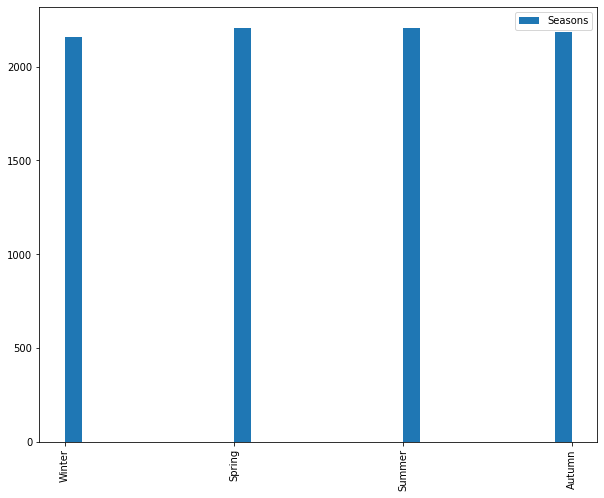

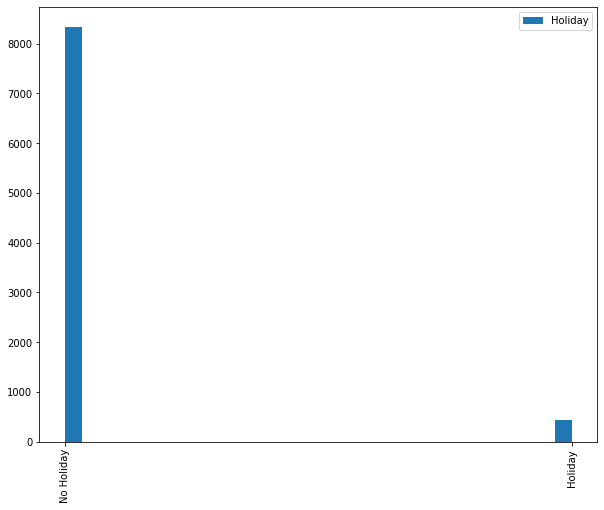

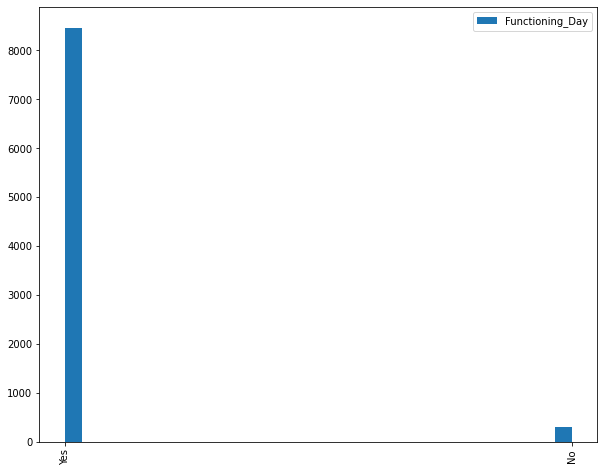

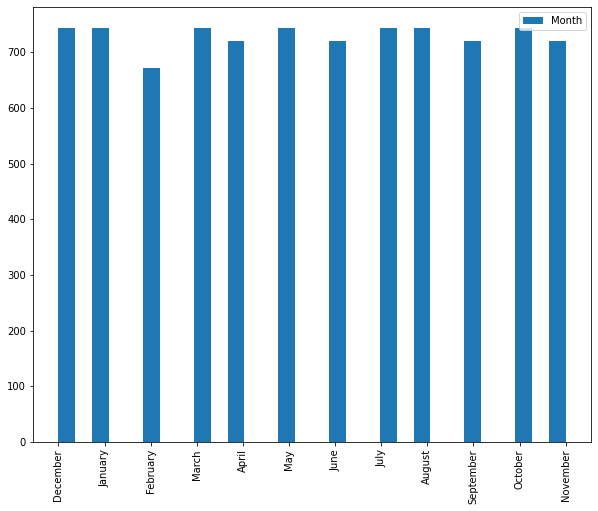

In [ ]:
# Visualizing histigrams of all categorical unique value counts
for i, var in enumerate(categorical_features):
  plt.figure(figsize=(10, 8))
  plt.hist(df[var], label=var, bins=30)
  plt.legend()
  plt.xticks(rotation=90)

**Some conclusion about unique value counts of categorical features**


*   **Seasons**: There are four unique values ,i.e., Winter, Spring, Summer, Autumn. All of them have somehow equal number of records. This means people prefer renting bikes in all seasons.
*   **Holidays**: There are only two unique values ,i.e., No Holiday, Holiday. No Holiday have high number of records which means people prefer to rent bike when they have some work and prefer to not rent bike when there is holiday.
*   **Functioning_Day**: This is similar to Holidays columns and same conclusion can be make for this ,i.e.. people rent bike when it is a functioning day.
*   **Month**: This have 12 unique values and all of them have records. February have lowest records. This columns represents the months in a year.



## Bivariate Analysis

**It is a type of analysis where we visualize two variables at one time**

Text(0, 0.5, 'Number of bikes rented')

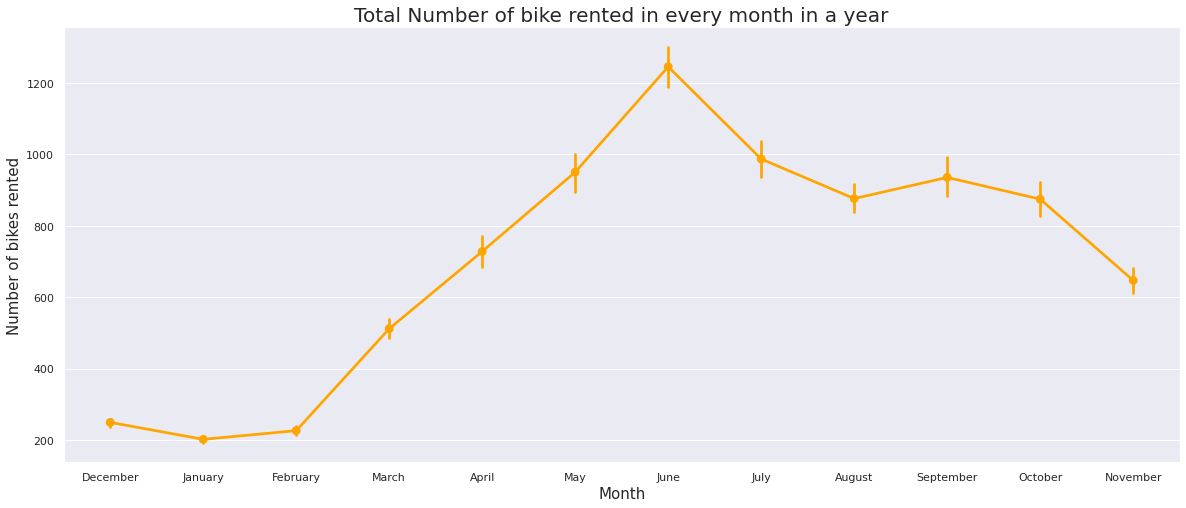

In [ ]:
# Visualizing the pointplot btween rented bike count and months
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Month', y='Rented_Bike_Count', color='orange')
plt.title("Total Number of bike rented in every month in a year", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Number of bikes rented", size=15)

**As we can see the graph, we can conclude that, the renting of bike increses when summer season starts(March) and starts decresing when summer season ends(september).**

In [ ]:
# Creating a dataframe by grouping on Seasons to get unique seasons and sum over the rented bikes to get total renting
seasons_df = df.groupby('Seasons')['Rented_Bike_Count'].sum().reset_index()

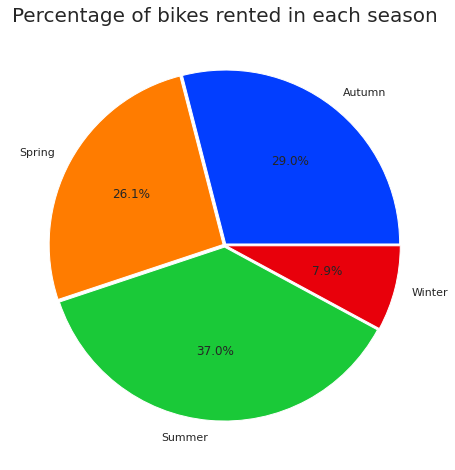

In [ ]:
# plotting a pie chart to visualize the percentage of renting a bike in every season
seasons = list(seasons_df['Seasons'])
bike_counting = list(seasons_df['Rented_Bike_Count'])

plt.figure(figsize=(8, 8))
explode = [0.01, 0.01, 0.01, 0.01]
plt.pie(bike_counting, labels=seasons, autopct='%1.1f%%', explode=explode, colors=sns.color_palette('bright'))
plt.title("Percentage of bikes rented in each season", size=20)
plt.show()

**From Pie chart, we can conclude that during summer, Spring and Autumn seasons people prefer to rent bikes and in winters less number of people prefer to rent bikes.**


*   **Summer**: 37 %
*   **Winter**: 7.9 %
*   **Spring**: 26.1 %
*   **Autumn**: 29 %



In [ ]:
# Creating a dataframe by grouping on temaperature and taking mean of it and extracting Rented_Bike_Count
temp_df = df.groupby('Temperature').mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

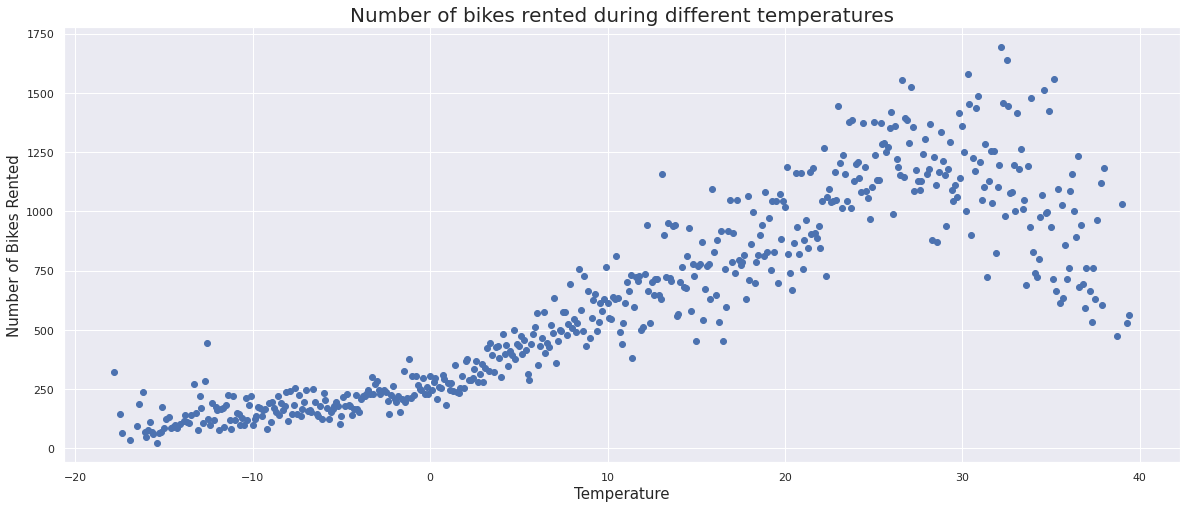

In [ ]:
# Visualizing scatter plot between temperature and number of bikes rented
sns.set()
plt.figure(figsize=(20, 8))
plt.scatter(temp_df['Temperature'], temp_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during different temperatures", size=20)
plt.xlabel("Temperature", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**From above graph we can conclude that:**

*   **When temperature is too cold(below 0 degree), less number of bikes rented by the people**
*   **When temperature is too hot(above 40), noone opted to rent bike.**
*   **More number of people prefer to rent a bike when temperature is moderate(between 20-30 degree).**



In [ ]:
# creating a dataframe for humidity percent and rented_bike_count
hum_df = df.groupby('Humidity')['Rented_Bike_Count'].sum().reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

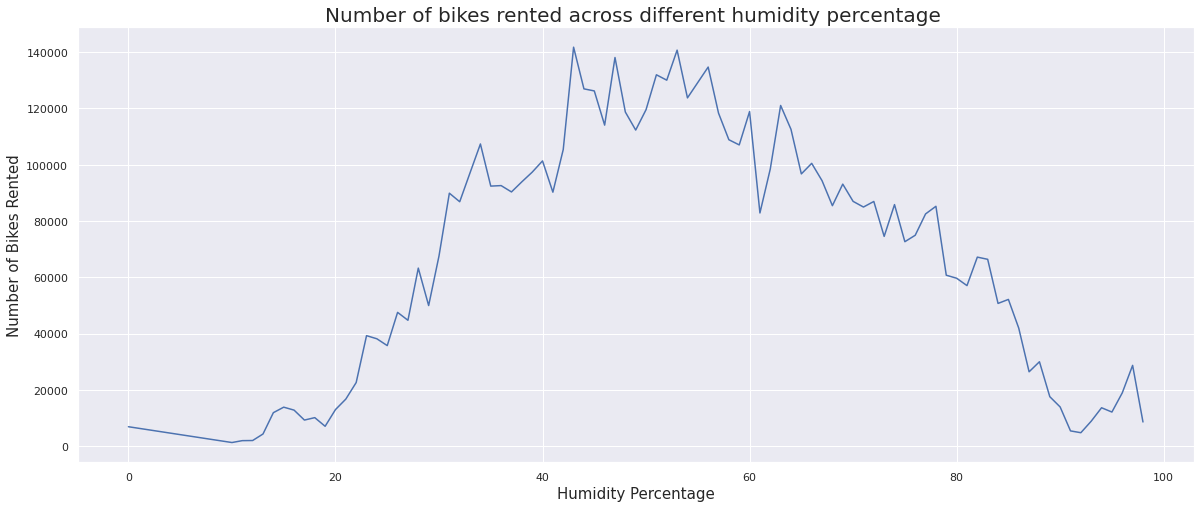

In [ ]:
# Visualizing the line graph to see in which humidity percent, people prefer to rent a bike
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(hum_df['Humidity'], hum_df['Rented_Bike_Count'])
plt.title("Number of bikes rented across different humidity percentage ", size=20)
plt.xlabel("Humidity Percentage", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**From above graph we can see that, more number of bikes are rented when humidity present in air is between 30 to 70 percent.**

In [ ]:
# Creating a dataframe by grouping on Rainfall and extracting Rented_Bike_Count
rain_df = df.groupby("Rainfall").mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

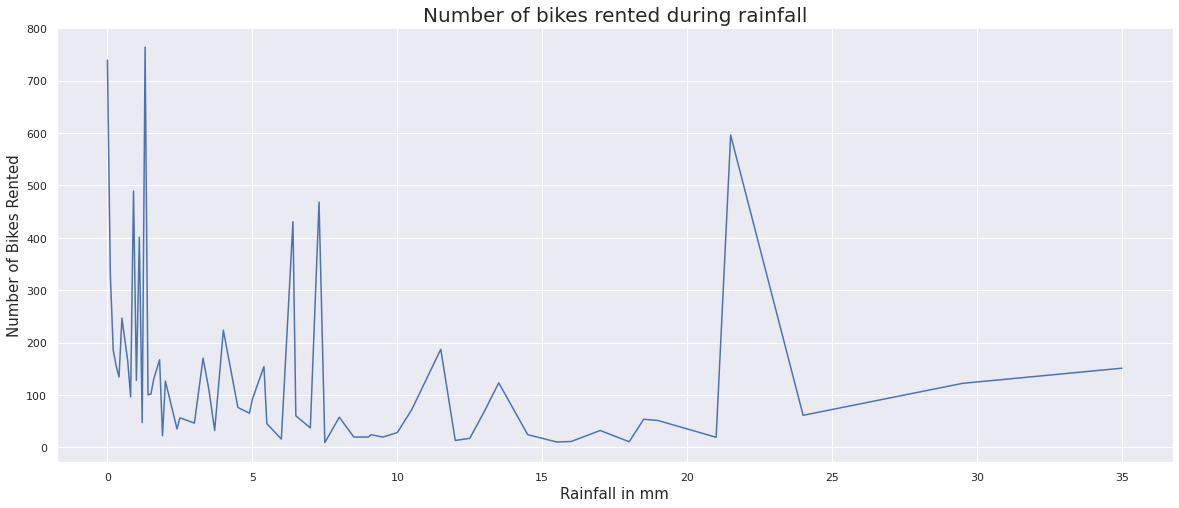

In [ ]:
# plotting a line plot to visualize people rent a bike during rainfall or not
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(rain_df['Rainfall'], rain_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during rainfall", size=20)
plt.xlabel("Rainfall in mm", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**Renting a bike is not affected that much during rainfall because we can see from graph that people had rented bike when it is raining 20-25mm.**

In [ ]:
# Creating a dataframe by grouping on Snowfall and extracting Rented_Bike_Count
snow_df = df.groupby("Snowfall").mean()['Rented_Bike_Count'].reset_index()

Text(0, 0.5, 'Number of Bikes Rented')

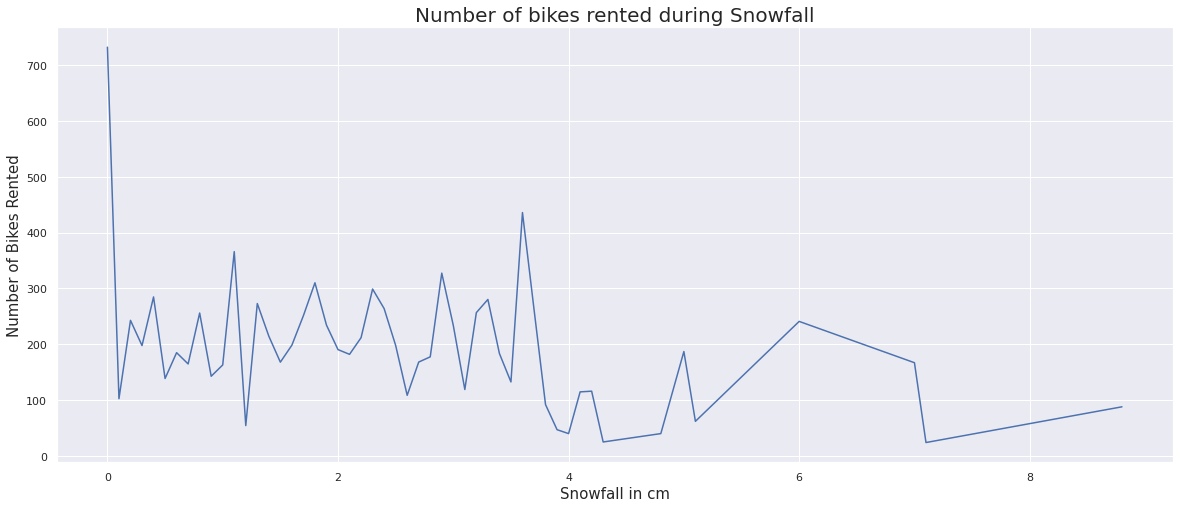

In [ ]:
# plotting a line plot to visualize people rent a bike during rainfall or not
sns.set()
plt.figure(figsize=(20, 8))
plt.plot(snow_df['Snowfall'], snow_df['Rented_Bike_Count'])
plt.title("Number of bikes rented during Snowfall", size=20)
plt.xlabel("Snowfall in cm", size=15)
plt.ylabel("Number of Bikes Rented", size=15)

**As we can see, when there is snowfall more than 4cm, few people rent a bike.**
**But when snowfall is less than 4cm, people still prefer to rent a bike.**

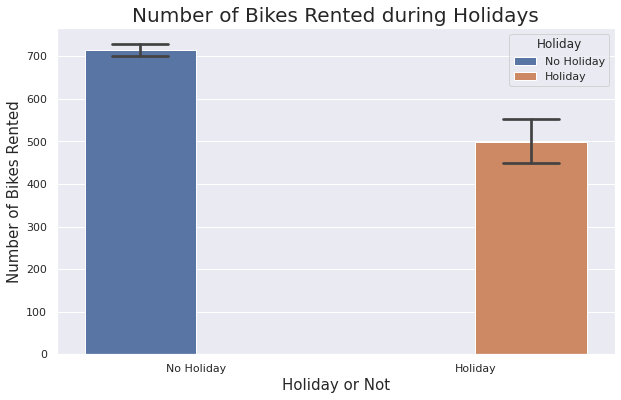

In [ ]:
# plotting a bar plot to visualize which days people rent a bike
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Holiday', y='Rented_Bike_Count', hue='Holiday', capsize=0.2)
plt.title("Number of Bikes Rented during Holidays", size=20)
plt.xlabel('Holiday or Not', size=15)
plt.ylabel("Number of Bikes Rented", size=15)
plt.show()

**For Columns - Holiday, Functioning_Day, Weekend**

**We can conclude that, chances of renting a bike increses when there is no holiday or we can say it is a functioning day and when there is a weekend or holiday, less number of people rent a bike.**

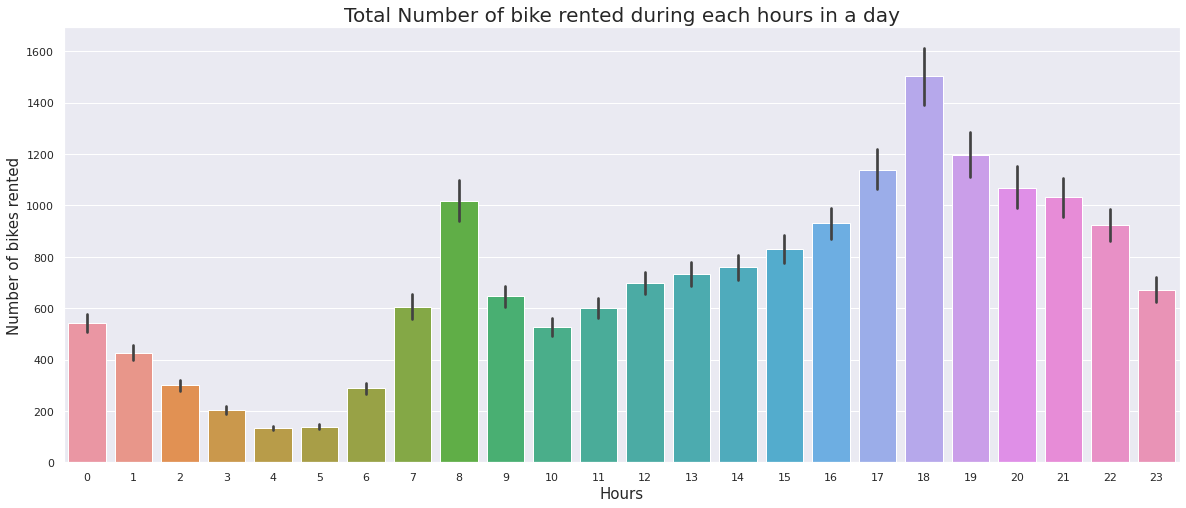

In [ ]:
# Visualizing the pointplot between rented bike count during each hour in a day
plt.figure(figsize=(20, 8))
sns.set()
sns.barplot(data=df, x='Hour', y='Rented_Bike_Count')
plt.title("Total Number of bike rented during each hours in a day", size=20)
plt.xlabel("Hours", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**From the above graph, we can conclude - more people rent a bike during daytime.**


*   **In Morning, people rent a bike around 7AM to 9AM, maybe while going to their work.**
*   **In Evening, people rent a bike around 5PM to 7Pm, maybe while returning from their office.**



## Multivariate Analysis

**It is a type of analysis where we analyse more than two variables at one time.**

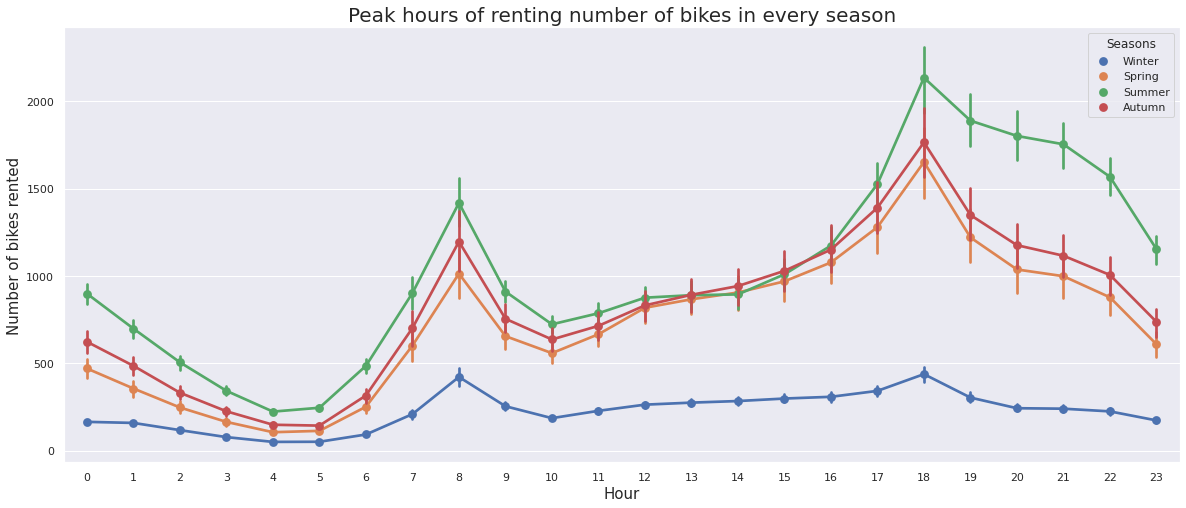

In [ ]:
# Plotting a pointplot to analyse the peak hour of renting bikes in every season
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Seasons')
plt.title("Peak hours of renting number of bikes in every season", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**We can conclude that :**

*   **People rent more number of bikes in summer season,  because of sunny days.**

*   **People rent less number of bikes in winter season, maybe because of snowfall.**

*   **In every season, the peak of renting bikes is around 8AM in the morning and 6PM in evening.**



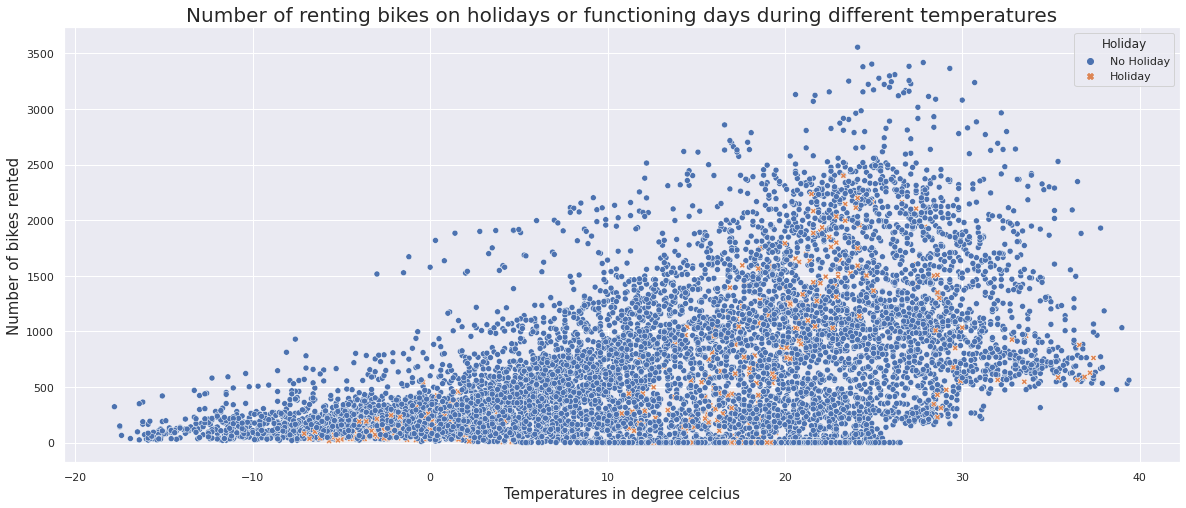

In [ ]:
# Plotting a scatterplot to analyse number of renting bikes during different temperatures when there is holiday or fuctioning day
plt.figure(figsize=(20, 8))
sns.set()
sns.scatterplot(data=df, x='Temperature', y='Rented_Bike_Count', hue='Holiday', style="Holiday")
plt.title("Number of renting bikes on holidays or functioning days during different temperatures", size=20)
plt.xlabel("Temperatures in degree celcius", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**From above graph, we can conclude that :**

*   **More number of bikes are rented when temperature is in between 10 degree and 30 degree celcius.**
*   **There are very few people who rent bikes during holidays.**
*   **More number of bikes are rented on functioning days no matter what is the temperature of the day.**



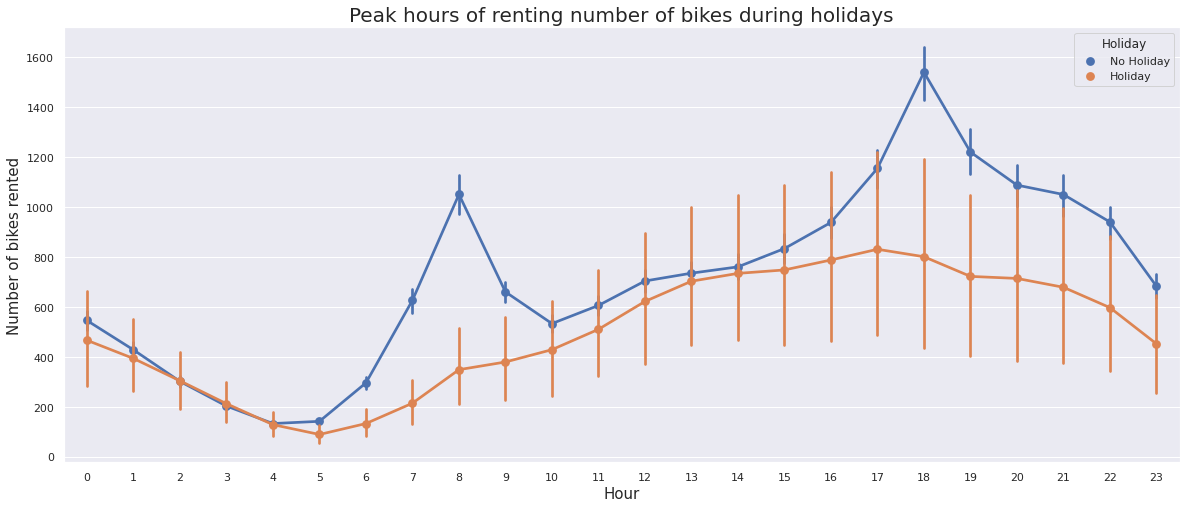

In [ ]:
# plotting a pointplot to analyse peak hours of renting bikes when there is holiday ot functioning day
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Holiday')
plt.title("Peak hours of renting number of bikes during holidays", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**When there is no holidays, more number of bikes are rented around 8AM and 6PM.**

**When there is a holiday, people rent a bike from 2PM to 8PM.**

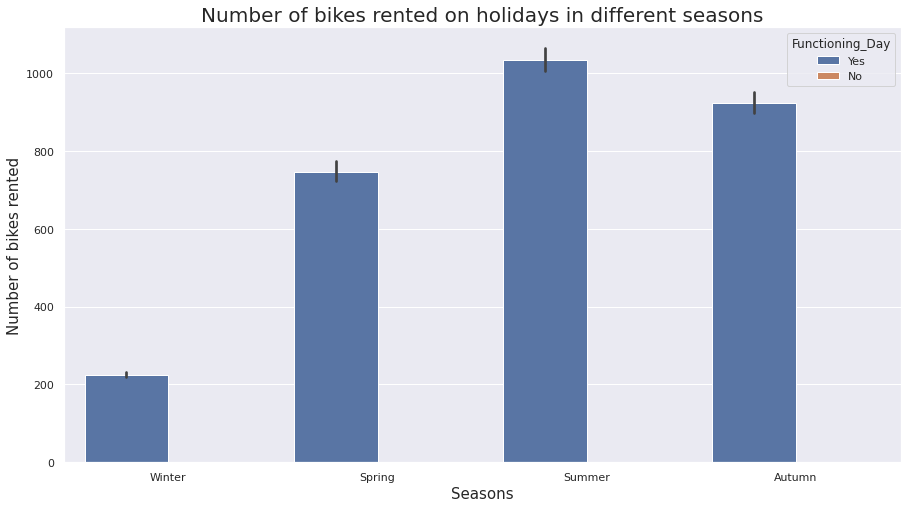

In [ ]:
# plotting a barplot to visualize which season have highest number of rented bikes when there is functioning day
plt.figure(figsize=(15, 8))
sns.set()
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', hue='Functioning_Day')
plt.title("Number of bikes rented on holidays in different seasons", size=20)
plt.xlabel("Seasons", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**More number of bikes are rented in summer, Autumn and Spring season.**

**During all seasons, people rent bike when it is a functioning day.**

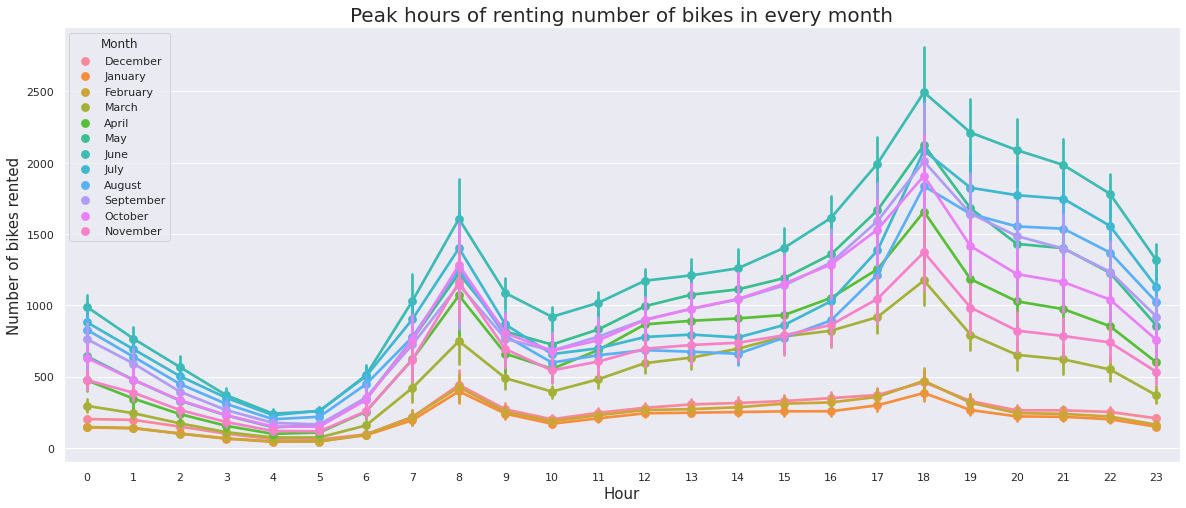

In [ ]:
plt.figure(figsize=(20, 8))
sns.set()
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Month')
plt.title("Peak hours of renting number of bikes in every month", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of bikes rented", size=15)
plt.show()

**More number of bikes are rented in summer season - May, June, July**

**Less number of bikes are rented in winter season - December, January**

## Linear Relationship Between Variables

**What is Regression Plot ?**

**Regression Plot is a type of plot in seaborn library which help us to find linear relationship between two variables by plotting aregression line.**

In [ ]:
# Separating all independent numerical column names
numerical_independent_features = list(set(df.select_dtypes(include=['int64', 'float64']).keys()) - {'Rented_Bike_Count'})
numerical_independent_features

['Weekend',
 'Solar_Radiation',
 'Humidity',
 'Visibility',
 'Wind_speed',
 'Dew_point_temperature',
 'Rainfall',
 'Hour',
 'Snowfall',
 'Temperature']

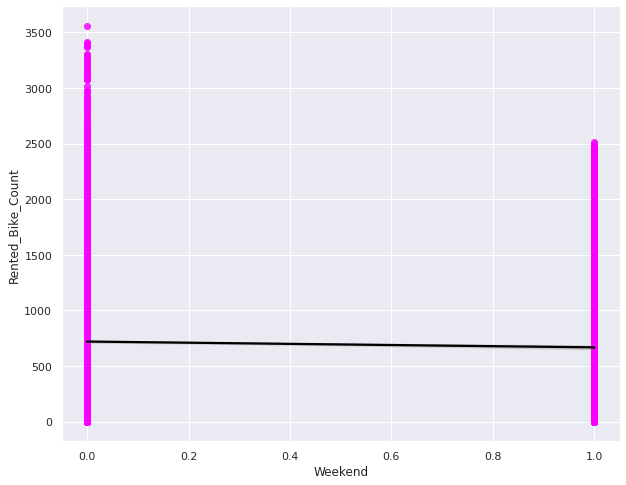

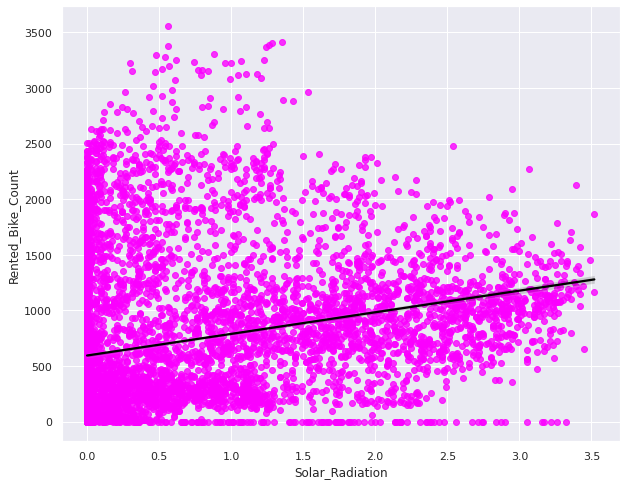

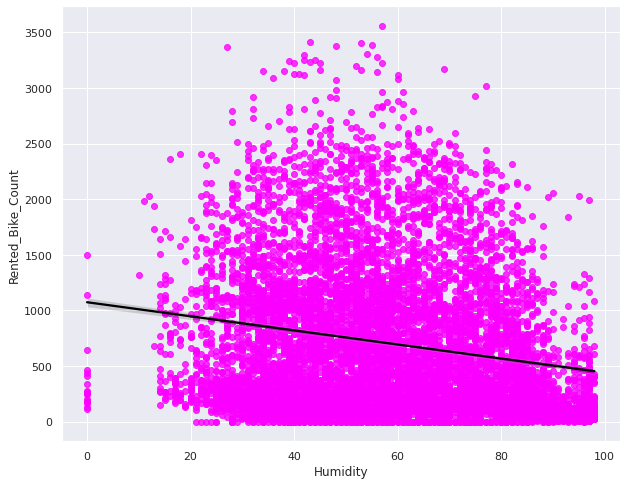

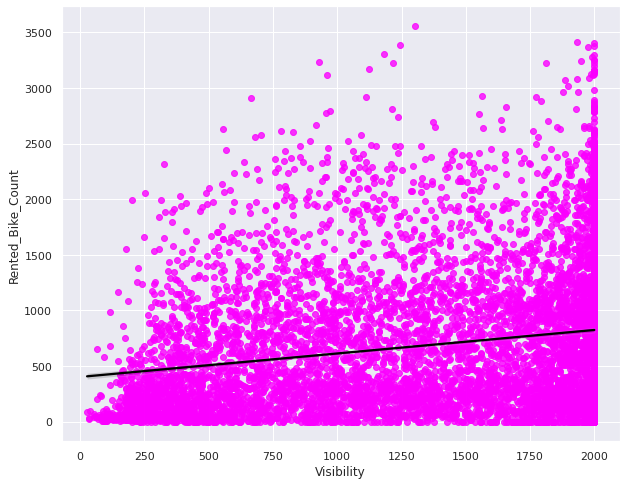

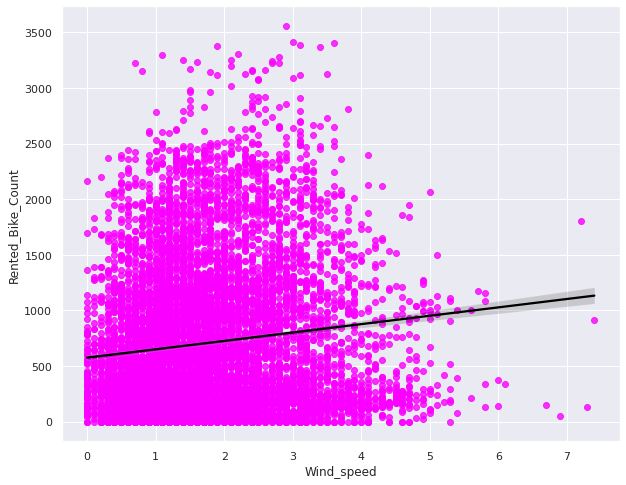

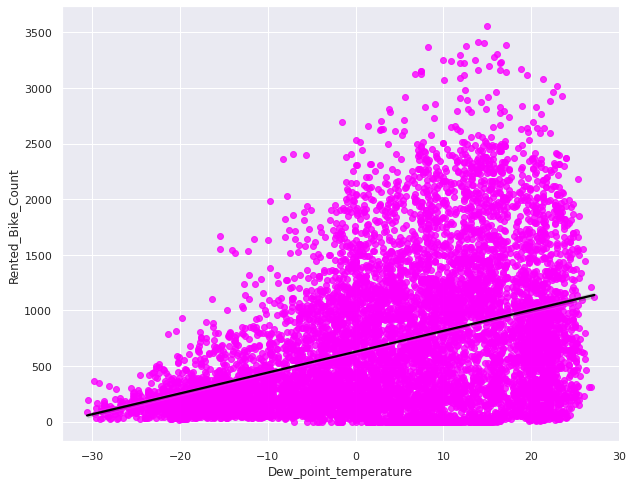

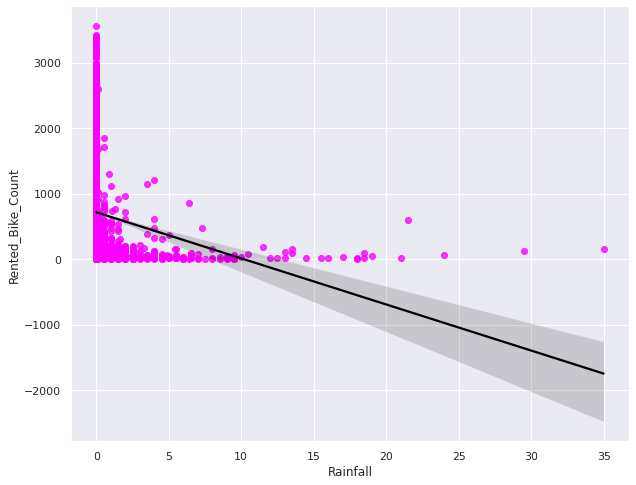

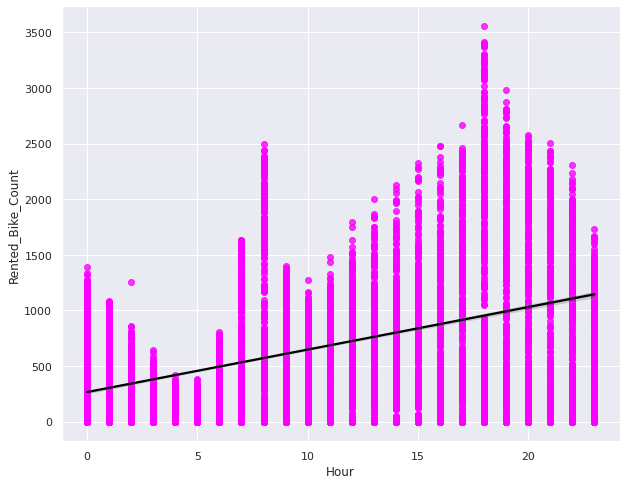

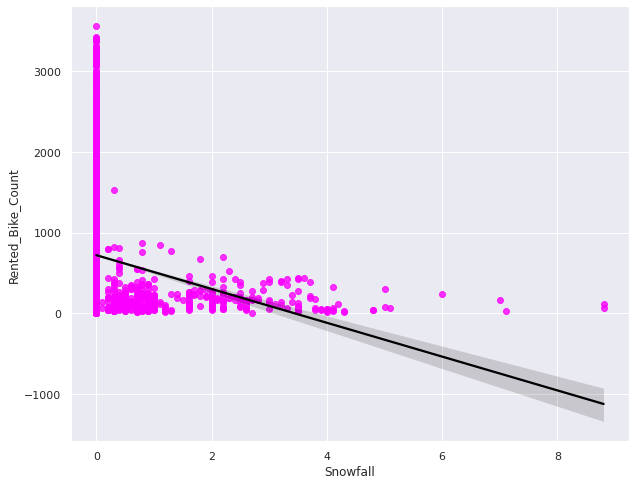

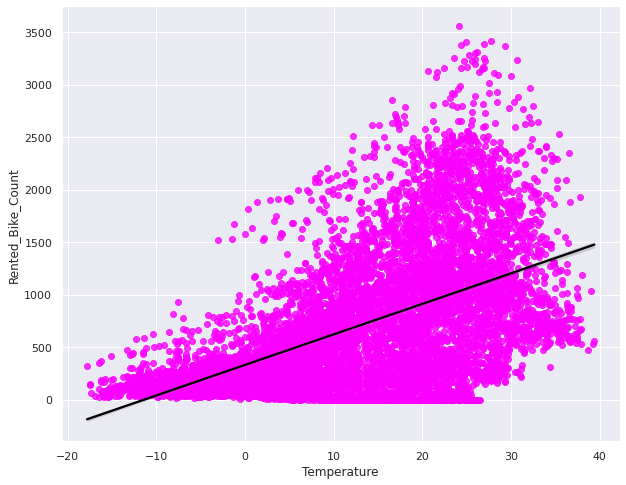

In [ ]:
# visualizing the linear relationship between numerical features by plotting regression plot
for i, var in enumerate(numerical_independent_features):
  fig,ax = plt.subplots(figsize=(10, 8))
  sns.regplot(x=df[var], y=df['Rented_Bike_Count'], scatter_kws={'color': '#FB00FF'}, line_kws={'color': 'black'})

**From the above regression plot, I am dividing columns into two parts :**

1.   **Positively Related to Target Variable :- Target variable increses on incresing the below variables.**

*   Solar_Radiation
*   Hour
*   Visibility
*   Wind_speed
*   Temperature
*   Dew_point_temperature


2.   **Negatively Related to Target Variable :- Target variable decreases on incresing below variables.**

*   Rainfall
*   Humidity
*   Weekend
*   Snowfall





# Data Pre-processing

## Visualizing the distribution of target variable

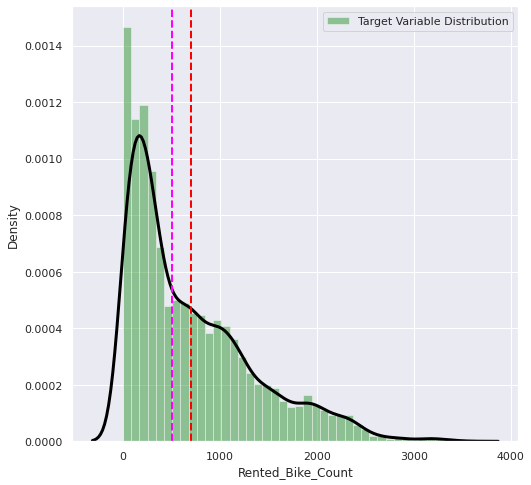

In [ ]:
# plotting the distribution plot to visualize the distribution of target variable
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(df['Rented_Bike_Count'], color='green', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution')
ax.axvline(df['Rented_Bike_Count'].mean(), linestyle='dashed', linewidth=2, color='red')
ax.axvline(df['Rented_Bike_Count'].median(), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**From above graph we can see that the target variable is right skewed and the assumption of Linear Regression algorithm is that the target variable should be normally distributed. Therefore, some transformation is required to make the distribution of target variable normal.**

**There are three types of tranformation we can apply to make it normal :**

1.   Log-Tranformation
2.   Square Root Transformation
3.   Inverse Tranformation



**There might be some outliers present in our target varaible. So first plotting a boxplot to detect outliers.**

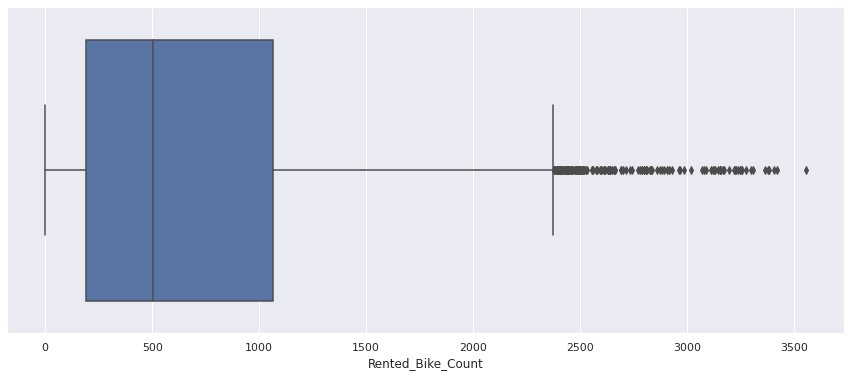

In [ ]:
# plotting a boxplot to detect outliers
sns.set()
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

**As we can see that there are outliers present in the data which affecting the distribution.**

## Normalizing the Target Variable

**What is Normalization ?**
**It is a technique used in data preprocessing. The goal of normalization is to minimze and exclude duplicate data.**

### Applying log tranformation

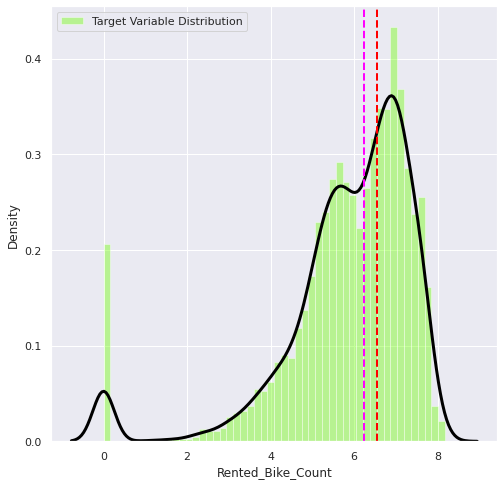

In [ ]:
# Applying log tranformation
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(np.log1p(df['Rented_Bike_Count']), color='#6CFF00', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution')
ax.axvline(np.log1p(df['Rented_Bike_Count'].mean()), linestyle='dashed', linewidth=2, color='red')
ax.axvline(np.log1p(df['Rented_Bike_Count'].median()), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**Log Tranformation make of distribution left skewed. Now we will apply square root tranformation.**

### Applying Square Root tranformation

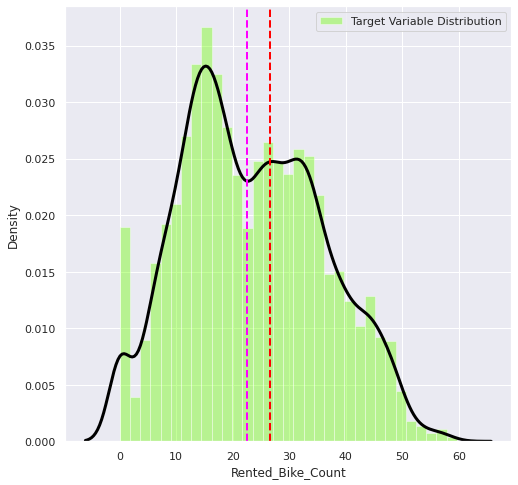

In [ ]:
# Applying Square Root Tranformation
sns.set()
plt.figure(figsize=(8, 8))
ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color='#6CFF00', kde_kws={'linewidth': 3, 'color': 'black'}, label='Target Variable Distribution', hist=True)
ax.axvline(np.sqrt(df['Rented_Bike_Count'].mean()), linestyle='dashed', linewidth=2, color='red')
ax.axvline(np.sqrt(df['Rented_Bike_Count'].median()), linestyle='dashed', linewidth=2, color='magenta')
plt.legend()
plt.show()

**As we can see that the distribution of target variable is now almost normally distributed.**

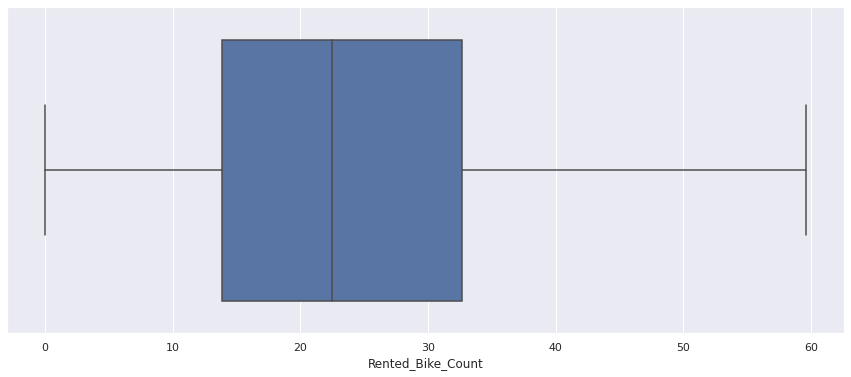

In [ ]:
# Now plotting a boxplot to detect outliers
sns.set()
plt.figure(figsize=(15, 6))
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

**After aplying Square Root Tranformation, we can see that there is not outlier present.**

## Correlation Between variables

<Axes: >

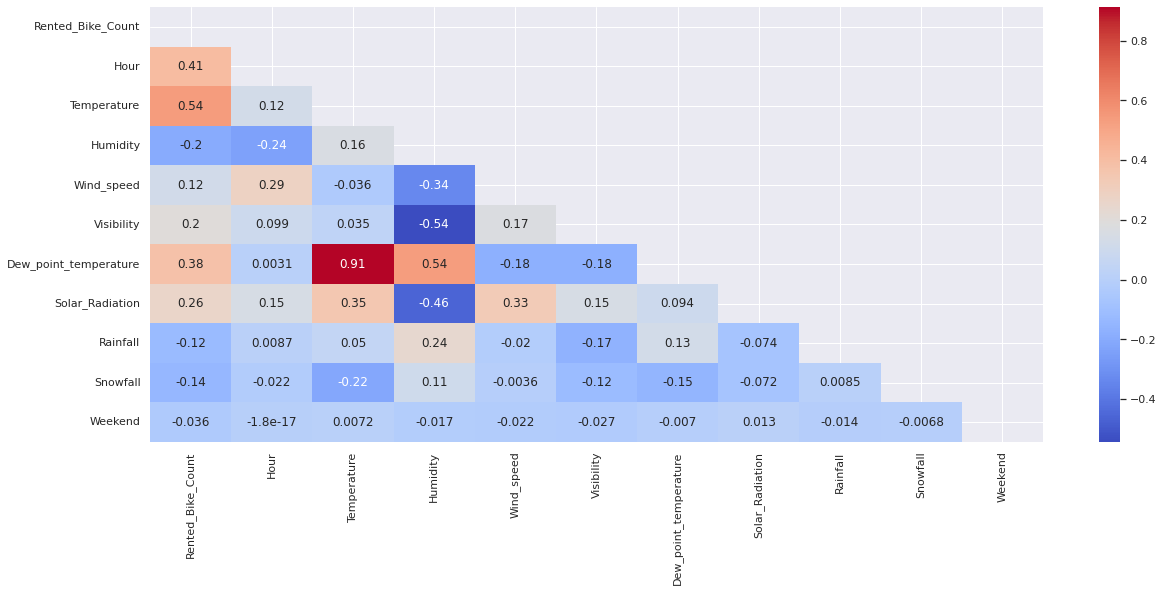

In [ ]:
# Creating a correlation matrix and then plotting a heatmap to visualize the correlation between variables
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

**From the above heatmap we can see that Dew_point_temperature is highly correlated with Temperature. So we can remove either one of them. I decided to remove Dew_point_temperature because I don't think people choose to rent a bike after observing morning temperature.**

## Removing Multicollinearity

**What is Multicollinearity ?**

Multicollinearity occurs when two or more independent variables are highly correlated with each other. If it is present between our independent variables than it affect our regression model accuracy.

**What is VIF ?**

It stands for Variance Inflation Factor. It helps us to remove multicollinearity. 

In [ ]:
# creating a variable holding names of all independet numeriacl columns
num_ind_cols = list(set(df.select_dtypes(include=['int64', 'float64']).columns)- {'Rented_Bike_Count'})
num_ind_cols

['Weekend',
 'Solar_Radiation',
 'Humidity',
 'Visibility',
 'Wind_speed',
 'Dew_point_temperature',
 'Rainfall',
 'Hour',
 'Snowfall',
 'Temperature']

In [ ]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# creating a function to return VIF values
def calculate_vif(X):
  '''
  This function returns the value of VIF
  '''
  dataframe = pd.DataFrame()
  dataframe['Columns'] = X.columns
  dataframe['VIF_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return dataframe

In [ ]:
# calculating the VIF for numerical independent variables
calculate_vif(df[num_ind_cols])

,Columns,VIF_value
0,Weekend,1.409388
1,Solar_Radiation,2.882383
2,Humidity,5.617480
3,Visibility,9.106191
4,Wind_speed,4.809775
5,Dew_point_temperature,17.505235
6,Rainfall,1.081868
7,Hour,4.418398
8,Snowfall,1.120882
9,Temperature,33.984042


We can see the same result shown by heatmap. VIF value for Temperature and Dew_point_temperature is high, hence we are removing Dew_point_temperature.

In [70]:
# Removing Dew_point_temperature from columns list
num_ind_cols = list(set(num_ind_cols) - {'Dew_point_temperature'})
num_ind_cols

['Weekend',
 'Solar_Radiation',
 'Humidity',
 'Visibility',
 'Wind_speed',
 'Rainfall',
 'Hour',
 'Snowfall',
 'Temperature']

In [71]:
# Now again calculating the vif value
calculate_vif(df[num_ind_cols])

,Columns,VIF_value
0,Weekend,1.378871
1,Solar_Radiation,2.254781
2,Humidity,5.016930
3,Visibility,4.738121
4,Wind_speed,4.608625
5,Rainfall,1.079752
6,Hour,3.930173
7,Snowfall,1.120665
8,Temperature,3.230140


As we can see we have removed multicollinearity by droping Dew_point_temperature.

In [72]:
# Dropping Dew_point_temperature from dataframe
df = df.drop(columns=['Dew_point_temperature'], axis=1)
df.shape

(8760, 14)

In [73]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'Month', 'Weekend'],
      dtype='object')

## Feature Encoding

As we know that to train a Machine Learning model we need to encode every categorical data in numbers.

In [74]:
df.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,0


In [82]:
# creating a variable holding all the names of columns which are categorical
cat_features = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']
cat_features

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Weekend']

In [79]:
# creating a copy of dataframe
data = df.copy()
data.shape

(8760, 14)

**Since all of the selected columns are nominal in nature so we will apply one-hot-encoding.**

In [80]:
# creating a function to do one hot encoding
def one_hot_encod(data, var):
  '''
  This function do one hot encoding to the categorical columns of dataframe
  '''
  data = pd.concat([data, pd.get_dummies(data[var], prefix=var, drop_first=True)], axis=1)
  data = data.drop(columns=[var], axis=1)
  return data

In [83]:
# Doing one hot encoding to all the categorical columns using a for loop
for col_name in cat_features:
  data = one_hot_encod(data=data, var=col_name)

In [86]:
data.head(2)

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

**The train test split is used to split the data into training set and testing set. The training set is used to train machine learning model and then test set is used to test the accuracy of the model on the unseen test data.**

In [91]:
# Assigning the values in two part X and y
X = data.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(data['Rented_Bike_Count'])

In [92]:
X.shape, y.shape

((8760, 47), (8760,))

In [100]:
# Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [101]:
print("Shape of train data : ", X_train.shape, y_train.shape)
print("Shape of test data : ",X_test.shape, y_test.shape)

Shape of train data :  (6570, 47) (6570,)
Shape of test data :  (2190, 47) (2190,)
